<a href="https://colab.research.google.com/github/zaterka/CarModelClassifier/blob/master/CarModel_Classifier_resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Model Classifier using fast.ai

For now, it has all vehicles from Honda and Toyota available in Brazil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the packages
import os
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the data from the folder where the images are
# The models are separated in folders inside the Train-TestFiles
root='/content/drive/My Drive/fastai/Train-TestFiles'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)
list_modelo = dirlist

['HONDA+CR-V', 'HONDA+CITY', 'HONDA+WR-V', 'HONDA+HR-V', 'HONDA+CIVIC', 'HONDA+ACCORD', 'HONDA+FIT', 'TOYOTA+CAMRY', 'TOYOTA+RAV4', 'TOYOTA+YARIS', 'TOYOTA+HILUX', 'TOYOTA+PRIUS', 'TOYOTA+FIELDER', 'TOYOTA+SW4', 'TOYOTA+ETIOS', 'TOYOTA+COROLLA', 'models']


In [ ]:
path = Path('/content/drive/My Drive/fastai/Train-TestFiles')

In [ ]:
# Now the databunch is created from the folders, using 20% as a validation test
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=300, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['HONDA+ACCORD',
 'HONDA+CITY',
 'HONDA+CIVIC',
 'HONDA+CR-V',
 'HONDA+FIT',
 'HONDA+HR-V',
 'HONDA+WR-V',
 'TOYOTA+CAMRY',
 'TOYOTA+COROLLA',
 'TOYOTA+ETIOS',
 'TOYOTA+FIELDER',
 'TOYOTA+HILUX',
 'TOYOTA+PRIUS',
 'TOYOTA+RAV4',
 'TOYOTA+SW4',
 'TOYOTA+YARIS']

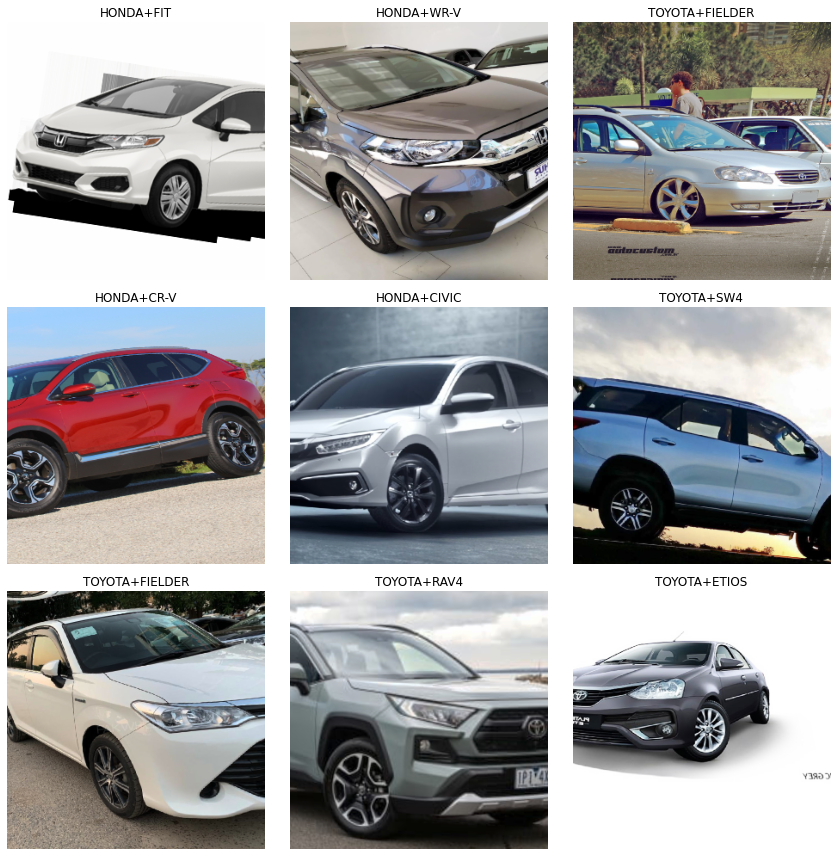

In [ ]:
# Taking a look at a sample of the dataset
data.show_batch(rows=3)

In [ ]:
# Checking the classes as well as the number of images for training and validation

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['HONDA+ACCORD',
  'HONDA+CITY',
  'HONDA+CIVIC',
  'HONDA+CR-V',
  'HONDA+FIT',
  'HONDA+HR-V',
  'HONDA+WR-V',
  'TOYOTA+CAMRY',
  'TOYOTA+COROLLA',
  'TOYOTA+ETIOS',
  'TOYOTA+FIELDER',
  'TOYOTA+HILUX',
  'TOYOTA+PRIUS',
  'TOYOTA+RAV4',
  'TOYOTA+SW4',
  'TOYOTA+YARIS'],
 16,
 879,
 219)

In [ ]:
# The pre-trained model used will be resnet34, because of the memory limitations of google colab 

learn = create_cnn(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(6)

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


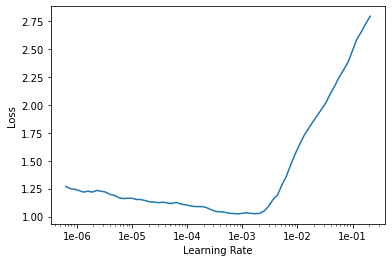

In [ ]:
# Now plot the learning rate to start training the model
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-3))

# From now there will be quite some training

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


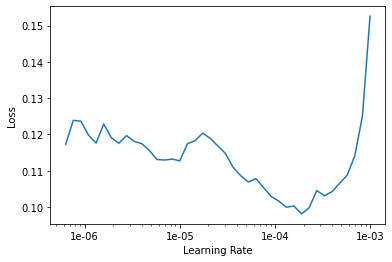

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-5, 1e-4))

In [ ]:
learn.save('s1-res34')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


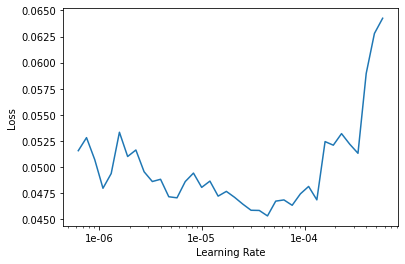

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-5, 4e-5))

In [ ]:
# Saving the model as it starts to perform better
learn.save('s2-res34')

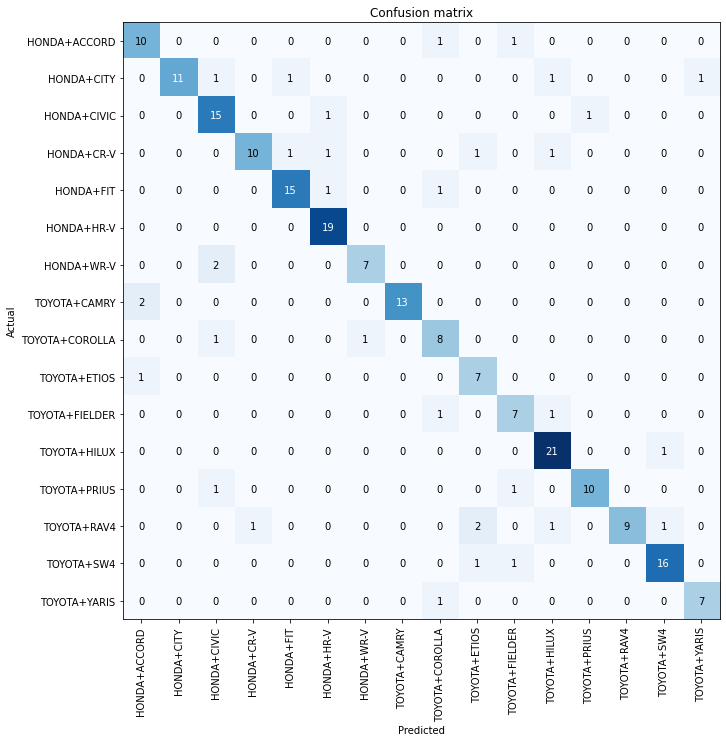

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(10,15))

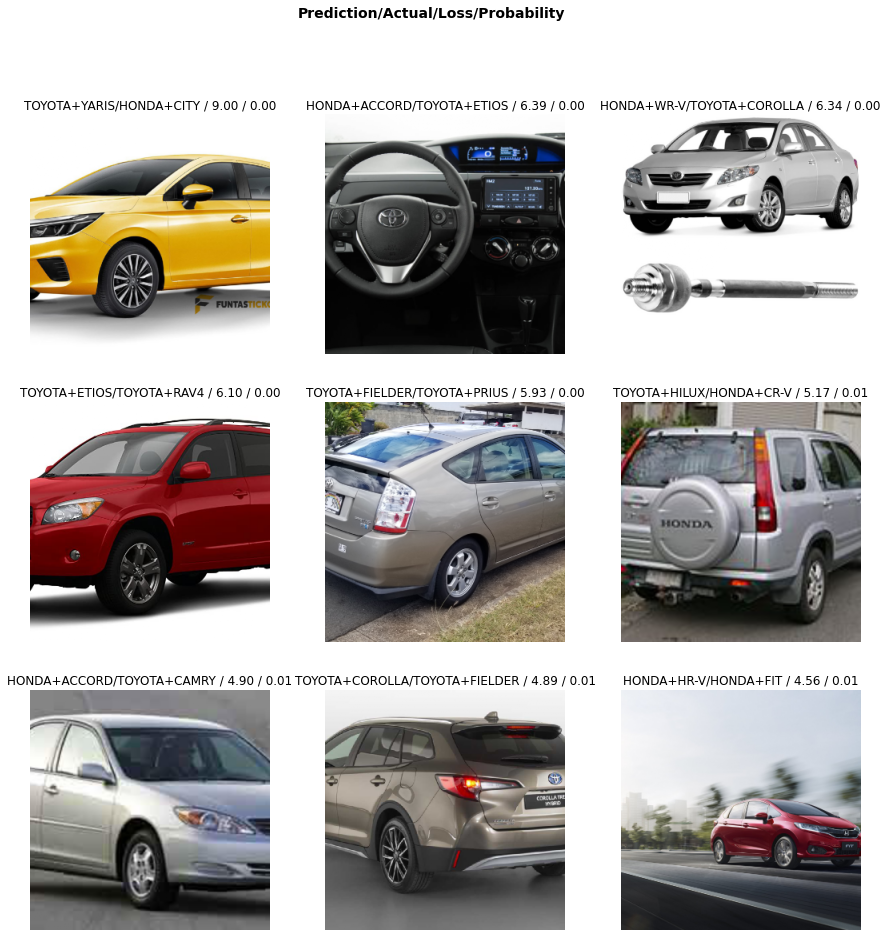

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


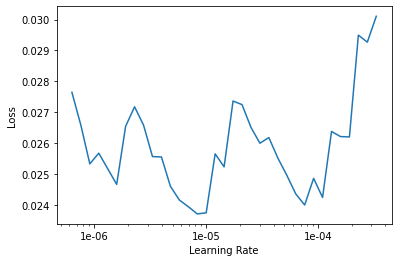

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(4e-6, 8e-6))

aqui

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


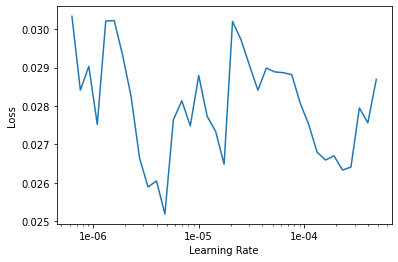

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(2e-6, 3e-6))

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


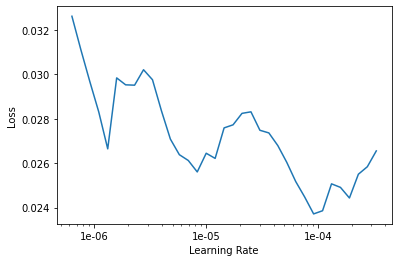

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(4e-5, 8e-5))

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


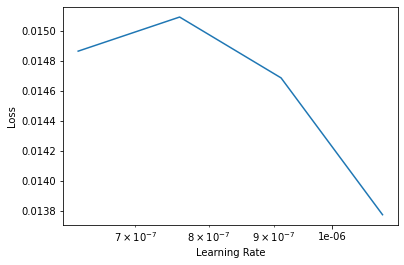

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 2e-6))

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


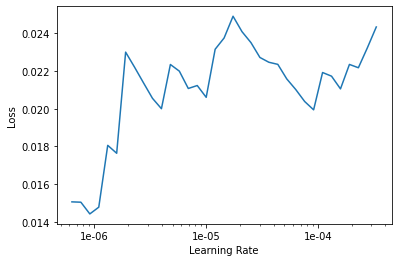

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-5, 9e-5))

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-7, 9e-7))

In [ ]:
# It seems like for now it peaked at 84.5% accuracy
learn.load('s2-res34')

# Some tests with internet images outside the train and validation sets

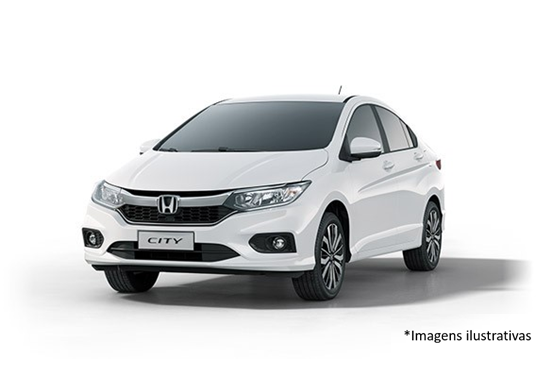

In [ ]:
# From: https://g1brsalesforcepictures.s3.us-east-2.amazonaws.com/a033l0000137DefAAE-202003271601917
# All rights reserved
img = open_image('/content/predict_exemplo.png')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)
print(pred_idx)
print(outputs)

HONDA+CITY
tensor(1)
tensor([1.6176e-03, 9.6701e-01, 2.0096e-03, 4.7655e-06, 2.7406e-02, 1.3928e-06,
        6.9403e-04, 1.8052e-05, 4.7152e-04, 4.5010e-04, 1.8531e-06, 1.8581e-06,
        2.8157e-04, 2.4116e-06, 1.5642e-06, 2.4242e-05])


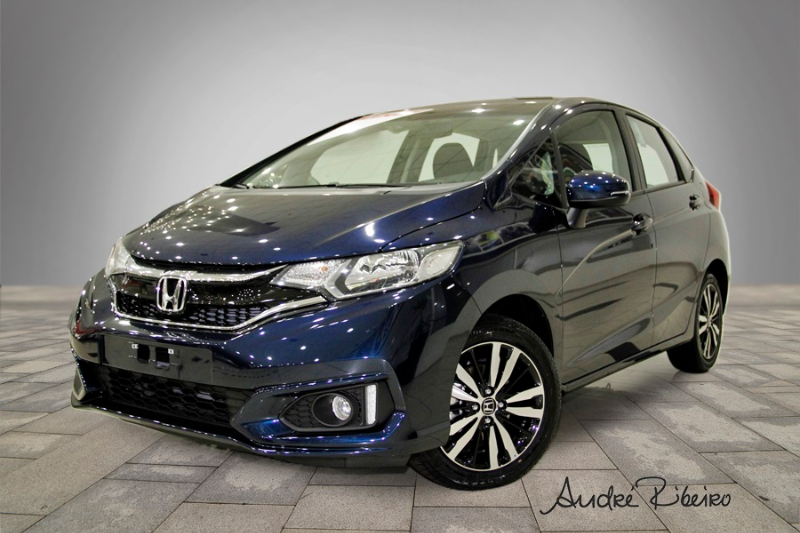

In [ ]:
# From: https://g1brsalesforcepictures.s3.us-east-2.amazonaws.com/a033l0000137UxJAAU-202005071142812
# All rights reserved
img2 = open_image('/content/predict_exemplo2.png')
img2

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(pred_class)

HONDA+FIT


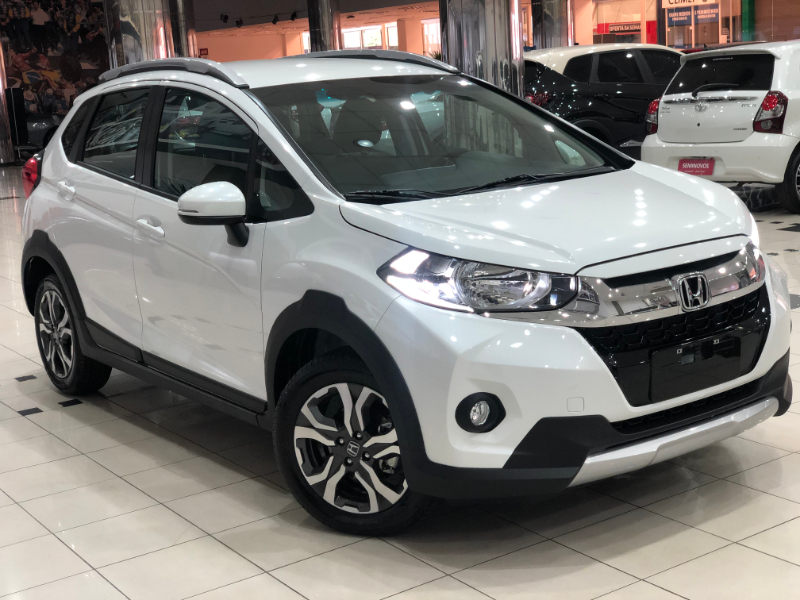

In [ ]:
# https://g1brsalesforcepictures.s3.us-east-2.amazonaws.com/a033l000012LAdlAAG-202004221640744
# All rights reserved
img3 = open_image('/content/predict_exemplo3.png')
img3

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img3)
print(pred_class)

HONDA+WR-V


# Next Steps

For the next steps, I will try fixing some images in the training dataset and also use resnet50 instead of resnet34. After that, add more brands into the model.